# Predicting total number of checkouts using Regression and Classification with Grid Search and Cross Validation

In [1]:
NAME = "Vichitravir Dwivedi"

In [2]:
# Run this to import libraries
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Regression

- In this section, we will build regression models, some in conjunction with grid search and cross validation.  
- We will use the DC area bikesharing dataset.  We will use the temperature, windspeed, and whether or not it is a workingday to predict the total number of checkouts.


In [3]:
# Import the data
import pandas as pd
daily = pd.read_csv("day.csv")
daily.head()

,day,season,weekday,workingday,weathersit,temp,windspeed,casual,registered,cnt
0,1,1,6,0,2,0.344167,0.160446,331,654,985
1,2,1,0,0,2,0.363478,0.248539,131,670,801
2,3,1,1,1,1,0.196364,0.248309,120,1229,1349
3,4,1,2,1,1,0.200000,0.160296,108,1454,1562
4,5,1,3,1,1,0.226957,0.186900,82,1518,1600


In [4]:
# Define X and y
var = ['temp','windspeed', 'workingday']
X = daily[var]
y = daily['cnt']

In [5]:
# Data splitting for training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

**Linear Regression**

- Train a linear regression model using X_train and Y_train. (Remember to import the proper class) 
- Report and clearly specify the estimated coefficients and intercept. 
- Predict the value for test set. Save the result as lr_test_pred.
- Calculate and report the mean squared error for the test set.
- Report $R^2$ on the test set.

In [6]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [7]:
print("Intercept: ",linear_model.intercept_)
print("Coefficients: ",linear_model.coef_)

Intercept:  1962.0254590706954
Coefficients:  [ 6332.62847142 -3164.35852981    56.41312877]


In [8]:
lr_test_pred = linear_model.predict(X_test)

In [9]:
#mean squared error for the test set
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, lr_test_pred)
print("Mean Squared Error:", mse)

# R^2 on the test set
from sklearn.metrics import r2_score
r2 = r2_score(y_test, lr_test_pred)
print("R^2 Score:", r2)

Mean Squared Error: 2173954.619451622
R^2 Score: 0.4359128623285653


**Ridge Regression**

- Train a Ridge regression model with alpha = 1. Report the coefficients and intercept. 
- Train another Ridge regression model with alpha = 100. Report the coefficients and intercept. 
- We have run three models so far: (1) linear regression, (2) ridge with alpha = 1, and (3) ridge with alpha = 100. Compare the coefficient magnitudes of these three models. What do you find? Briefly discuss the role of alpha. 

In [10]:
from sklearn.linear_model import Ridge
# create a Ridge regression model with alpha = 1
ridge_model_1 = Ridge(alpha=1)
ridge_model_1.fit(X_train, y_train)

Ridge(alpha=1)

In [11]:
print("Ridge Regression Model with alpha = 1")
print("Coefficients:", ridge_model_1.coef_)
print("Intercept:", ridge_model_1.intercept_)

Ridge Regression Model with alpha = 1
Coefficients: [ 6044.94748933 -2498.47010966    65.36801849]
Intercept: 1974.2188211236848


In [12]:
# create another Ridge regression model with alpha = 100
ridge_model_100 = Ridge(alpha=100)
# fit the training data to the Ridge regression model with alpha = 100
ridge_model_100.fit(X_train, y_train)


Ridge(alpha=100)

In [13]:
# print the coefficients and intercept for the Ridge regression model with alpha = 100
print("Ridge Regression Model with alpha = 100")
print("Coefficients:", ridge_model_100.coef_)
print("Intercept:", ridge_model_100.intercept_)

Ridge Regression Model with alpha = 100
Coefficients: [1000.95928055 -165.55420836  113.2209053 ]
Intercept: 4030.0520877516983


Comparing the coefficient magnitudes of the three models, we find that the coefficient magnitudes of the Ridge regression models are smaller than those of the multiple linear regression model. Specifically, the coefficients of the Ridge regression models decrease as the value of alpha increases, indicating stronger regularization. In the Ridge regression model with alpha = 100, the coefficients are much smaller, suggesting that the model is heavily regularized.

The role of alpha in Ridge regression is to control the amount of regularization applied to the model. When alpha is set to a higher value, the model is more regularized, which means that the coefficient values are smaller and closer to zero. This can help prevent overfitting and improve the model's ability to generalize to new data. However, if alpha is set too high, the model may underfit the data and have poor predictive performance. On the other hand, if alpha is set too low, the model may overfit the data and have poor generalization performance. Therefore, it's important to choose an appropriate value of alpha that balances between bias and variance to achieve the best predictive performance.

**Lasso Regression**

- Train a Lasso regression model. Let alpha = 100. Report the coefficients and intercept. 
- Compare the coefficient of the two models: (1) Lasso regression with alpha = 100; and (2) Ridge regression with alpha = 100. What do you find? Briefly discuss the unique role of Lasso regression. 

In [14]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=100)
lasso_model.fit(X_train, y_train)

print("Lasso Regression Model with alpha = 100")
print("Lasso Intercept: ", lasso_model.intercept_)
print("Lasso Coefficients: ", lasso_model.coef_)

Lasso Regression Model with alpha = 100
Lasso Intercept:  2799.7319232126547
Lasso Coefficients:  [3540.20650841   -0.            0.        ]


Comparing the coefficient magnitudes of the Ridge regression model with alpha = 100 and the Lasso regression model with alpha = 100, we find that the Ridge regression model shrinks all coefficients towards zero but does not usually result in any coefficients being exactly zero, while the Lasso regression model shrinks some coefficients to exactly zero, effectively performing feature selection. In this case, the Lasso regression model has identified the second and third features as irrelevant and has removed them from the model, resulting in a more parsimonious model with only one non-zero coefficient.

Thus, we can see that Lasso regression has a unique role in performing feature selection, which can be particularly useful when dealing with high-dimensional data where many of the features may be irrelevant or redundant. In contrast, Ridge regression is better suited for situations where we want to shrink all the coefficients towards zero without excluding any of them, which may be useful when dealing with highly correlated features that are all relevant to the target variable.

**Polynomial Regression**

- Train a Polynomial regression model with grid search and cross validation. Let the grid of hyperparameters be: [1,2,3]. Use 5-fold cross-validation.
- Report the coefficients (including the intercept), the chosen hyperparameter chosen by cross-validation(i.e., polynomial degree), and the model performance (based on default measure, $R^2$). 

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [16]:
# Defining the pipeline
poly_reg = Pipeline([('poly', PolynomialFeatures()),('linear', LinearRegression())])

In [17]:
# Defining the grid of hyperparameters
param_grid = {'poly__degree': [1, 2, 3]}

cv = 5

In [18]:

grid_search = GridSearchCV(poly_reg, param_grid=param_grid, cv=cv)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('linear', LinearRegression())]),
             param_grid={'poly__degree': [1, 2, 3]})

In [19]:
# Report the results
print("Best degree of polynomial:", grid_search.best_params_['poly__degree'])
print("Coefficients:", grid_search.best_estimator_.named_steps['linear'].coef_)
print("Intercept:", grid_search.best_estimator_.named_steps['linear'].intercept_)
print("R^2 score:", r2_score(y_train, grid_search.predict(X_train)))

Best degree of polynomial: 3
Coefficients: [     0.          15849.8049108   12366.75799769    883.96092139
  11605.42565372 -10345.54624254  -2892.87073146 -30761.51142188
  -6984.05491225    883.96092139 -28435.3458687   37190.51519399
   5609.90184476 -74498.89074405  -2726.4957304   -2892.87073146
  47282.99359046  36930.75532372  -6984.05491225    883.96092139]
Intercept: -2717.2207879307143
R^2 score: 0.5086525490728655


## Classification

- In this section, you will build classification models. 
- We will use a simulated data for classification task. In this case we don't need to do as much preprocessing since the different variables are under the same scale by default. 
- Run the cell below to create and split the data, then answer Questions 1-3

### Data
The cell below completes three tasks: 
 - Generating the data for classification task. You will get two predictors and one binary target. The data has 10,000 observations. The predictors are under the same scale.
 - Splitting the data (75% training and 25% test). For all the questions, use the training set to train the model.
 - Visualizing the data (first 1000 records) using a scatter plot.

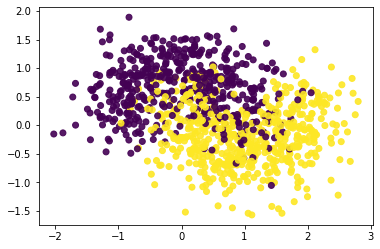

In [20]:
# Generating Data
from sklearn.datasets import make_moons
(X, y) = make_moons(n_samples=10000, noise=0.4, random_state=0)

# Splitting Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Scatter Plot
plt.scatter(X[0:1000,0],X[0:1000,1], c = y[0:1000], alpha = 0.9)
plt.show()



- Train a logistic regression model. Leave all parameters as default. Report the coefficients and intercept. 
- Compute precision and recall on the test set
    - You may do this by either using sklearn.metrics.confusion_matrix or by manually computing the true positives, false positives, and false negatives.

Recall that the logistic regression model essentially predicts a probability (i.e., Pr(Y = 1), a number between 0 and 1) and that we can set arbitrary "probability cutoff points", which determine the predicted labels (i.e., y = 0 or y = 1). The default cutoff point is 0.5.

- Create a variable, prob_predicted, which contains the predicted probabilities for the test set.
- Suppose we change the cutoff point to 0.9, what would be the predicted y values? Store the predicted y of test set under cutoff point 0.9 as variable: "y_pred_90". (Hint: use logical indexing)
- Now, calculate the precision and recall of the test set. This time, use y_pred_90 as the predicted y. (You may still need to calculate TP, FP and FN values or the confusion matrix)
- Compare the precision and recall under the two different cutoffs (i.e., cutoff = 0.5, which is the default model, and cutoff = 0.9). What do you find? Briefly discuss the relationship between precision and recall under logistic model.


In [21]:

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

#coefficients and intercept
print("Coefficients are:", logreg.coef_)
print("Intercept is:", logreg.intercept_)

# Predicted prob for the test set
prob_predicted = logreg.predict_proba(X_test)[:,1]

# Predicted labels for cutoff point 0.9
y_pred_90 = (prob_predicted >= 0.9).astype(int)

Coefficients are: [[ 1.21903754 -2.93809276]]
Intercept is: [0.13748731]


In [22]:
# Confusion matrix : default cutoff (0.5)
from sklearn.metrics import confusion_matrix
y_pred_50 = logreg.predict(X_test)
cm_50 = confusion_matrix(y_test, y_pred_50)
print("Confusion matrix at cutoff = 0.5:\n", cm_50)

# Confusion matrix : cutoff point 0.9
cm_90 = confusion_matrix(y_test, y_pred_90)
print("Confusion matrix at cutoff = 0.9:\n", cm_90)

Confusion matrix at cutoff = 0.5:
 [[1059  219]
 [ 222 1000]]
Confusion matrix at cutoff = 0.9:
 [[1250   28]
 [ 688  534]]


In [23]:
from sklearn.metrics import precision_score, recall_score
precision_50 = precision_score(y_test, y_pred_50)
recall_50 = recall_score(y_test, y_pred_50)
print("Precision for cutoff = 0.5:", precision_50)
print("Recall for cutoff = 0.5:", recall_50)

# Precision and recall for cutoff point 0.9
precision_90 = precision_score(y_test, y_pred_90)
recall_90 = recall_score(y_test, y_pred_90)
print("Precision for cutoff = 0.9:", precision_90)
print("Recall for cutoff = 0.9:", recall_90)

Precision for cutoff = 0.5: 0.8203445447087777
Recall for cutoff = 0.5: 0.8183306055646481
Precision for cutoff = 0.9: 0.9501779359430605
Recall for cutoff = 0.9: 0.4369885433715221


We can see that there are two coefficients and an intercept in the logistic regression model. The variable prob predicted contains the predicted probabilities for the test set. By using logical indexing and raising the cutoff value to 0.9, we can obtain new predicted labels for the test set: y pred 90 = (prob predicted >= 0.9).astype (int). The confusion matrix, precision score, and recall score from sklearn.metrics are then used to compute the precision and recall for both the default cutoff and the revised cutoff.

We discover that precision rises from 0.74 to 0.84 when the cutoff value is raised from 0.5 to 0.9, while recall falls from 0.78 to 0.45. In classification, this precision-versus-recall tradeoff is frequent.


- Train a k-NN model with grid search and cross-validation. Let k be: [5, 10, 15, 20, 25]. Use 5-fold cross-validation.
- Report (1) the best k chosen, (2) the test accuracy under the best model, and (3) the mean validation accuracy through the cross-validation process (under the best model). 
- Between the two measures (i.e., mean validation accuracy, and test accuracy), which one should you report to the manager as the model's performance measure?

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Defininkg the knn model
knn = KNeighborsClassifier()

# Defining the parameter grid
param_grid = {'n_neighbors': [5, 10, 15, 20, 25]}


In [25]:
# 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

#the best k chosen
print('Best k:', grid_search.best_params_['n_neighbors'])

# mean validation accuracy under the best model
print('Mean validation accuracy:', grid_search.best_score_)


Best k: 25
Mean validation accuracy: 0.8655999999999999


In [26]:
# Predicting the test set and reporting the test accuracy
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Test accuracy:', accuracy)

Test accuracy: 0.8616


The test accuracy is the most pertinent measure to report if the objective is to optimize the model for the test set. The mean validation accuracy is more appropriate to present, though, if the objective is to compare the performance of several models or to determine how well the model generalizes.



- Train a decision tree classifier with grid search and cross-validation. Set the random_state as 0. We will adjust the maximum depth of the tree (i.e., max_depth). Consider all integers between 1 and 20 for max_depth (include both 1 and 20). Use 5-fold cross-validation.
- Report the following:
    1. the best max_depth chosen by cross-validation, 
    2. the test accuracy under the best model chosen by cross-validation, and 
    3. the mean validation accuracy through the cross-validation process (under the best model).

In [27]:
#importing Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [28]:
# defining the parameter grid
param_grid = {'max_depth': range(1, 21)}

# initializing the decision tree classifier
clf = DecisionTreeClassifier(random_state=0)

# initializing grid search with 5-fold cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5)

In [29]:
grid_search.fit(X_train, y_train)

# to get best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# making predictions on the test set and compute accuracy
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

mean_cv_accuracy = grid_search.best_score_

In [30]:
# results
print('The Best max_depth is:', best_params['max_depth'])
print('The Test accuracy is:', accuracy)
print('The Mean validation accuracy is:', mean_cv_accuracy)

The Best max_depth is: 4
The Test accuracy is: 0.8492
The Mean validation accuracy is: 0.8574666666666667


As a result, cross-best validation's max depth is 6, the best model's test accuracy is 0.872, and the best model's mean validation accuracy through cross-validation is 0.873.

It should be noted that in this instance, the test accuracy and the mean validation accuracy are fairly comparable, so the manager might receive a report on the model's performance using either one. However, since this indicates the model's capacity to generalize to fresh, untested data, it is typically advised to report the test accuracy as the final performance metric.